In [1]:
import glob
import os
import pandas
import bitstring
from lib import *
pandas.set_option('display.width', 800)

/tmp/ipykernel_3994518/2415918054.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [2]:
response_dir = 'storage-response'
storage_dut_dir = 'storage-dut'

In [3]:
soc_names = [name for name in os.listdir(response_dir) if os.path.isdir(f'{response_dir}/{name}') and not name.startswith('.')]

In [4]:
soc_names

['airisc']

In [5]:
df = parse_all_socs(response_dir, soc_names)

Did not parse all__int_array__tmu_ext__int_debug.elf.raw
Did not parse bs__int_array__tmu_ext__int_debug.elf.raw
Did not parse bs__sorted__tmu_ext__int_debug.elf.raw
Did not parse cs__int_array__tmu_ext__int_debug.elf.raw
Did not parse rs__int_array__tmu_ext__int_debug.elf.raw


In [ ]:
df

In [6]:
tmu_dfs = {}
symbols = {}
for i in df.index:
    row = df.iloc[i]
    #print(row)
    tmp = read_symbols_from_elf(storage_dut_dir, row['soc'], row['soc_config'], row['firmware'], row['raw-name'])
    symbols[i] = post_process_symbols(tmp)
    tmu_dfs[i] = parse_tmu_transactions(df['tmu_transmissions'][i], symbols[i])
    if len(tmu_dfs[i])==0:
        continue
    try:
        find_tmu_isr(tmu_dfs[i])
    except AssertionError:
        print("Potential missing data detected!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        df.at[i, 'raw_hil_status'] = 'Potential missing data'
        continue
    df.at[i,"tmu_transactions"] = len(tmu_dfs[i]['tid'])
    df.at[i,"tmu_interrupts"] = tmu_dfs[i]['tid'].max()+1
    curr_tmu = tmu_dfs[i]
    df.at[i,"tmu_compression_total_cycles_max"]  = curr_tmu['cont'].max()+1
    df.at[i,"tmu_compression_total_cycles_mean"] = curr_tmu['cont'].mean()+1
    df.at[i,"tmu_compression_total_cycles_min"]  = curr_tmu['cont'].min()+1
    df.at[i,"tmu_compression_stack_cycles_max"]  = curr_tmu[curr_tmu['symbol']=='stack']['cont'].max()+1
    df.at[i,"tmu_compression_stack_cycles_mean"] = curr_tmu[curr_tmu['symbol']=='stack']['cont'].mean()+1
    df.at[i,"tmu_compression_stack_cycles_min"]  = curr_tmu[curr_tmu['symbol']=='stack']['cont'].min()+1
    df.at[i,"tmu_compression_no_stack_cycles_max"]  = curr_tmu[curr_tmu['symbol']!='stack']['cont'].max()+1
    df.at[i,"tmu_compression_no_stack_cycles_mean"] = curr_tmu[curr_tmu['symbol']!='stack']['cont'].mean()+1
    df.at[i,"tmu_compression_no_stack_cycles_min"]  = curr_tmu[curr_tmu['symbol']!='stack']['cont'].min()+1    
    df.at[i,"tmu_compression_isr_cycles_max"]  = curr_tmu[curr_tmu['isr']==True]['cont'].max()+1
    df.at[i,"tmu_compression_isr_cycles_mean"] = curr_tmu[curr_tmu['isr']==True]['cont'].mean()+1
    df.at[i,"tmu_compression_isr_cycles_min"]  = curr_tmu[curr_tmu['isr']==True]['cont'].min()+1    
    df.at[i,"tmu_compression_no_isr_cycles_max"]  = curr_tmu[curr_tmu['isr']==False]['cont'].max()+1
    df.at[i,"tmu_compression_no_isr_cycles_mean"] = curr_tmu[curr_tmu['isr']==False]['cont'].mean()+1
    df.at[i,"tmu_compression_no_isr_cycles_min"]  = curr_tmu[curr_tmu['isr']==False]['cont'].min()+1    
        

Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 4 with ['stack' 'storage' nan 'marker_func_done'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 3 with ['storage' 'marker_func_done' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 3 with ['storage' 'stack' nan] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 3 with ['storage' 'stack' nan] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_op

Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 3 with ['storage' 'stack' nan] and therefore may not belong to isr
Potential missing data detected!!!!!!!!!!!!!!!!!!!!!!!!!!!
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 1 with ['storage'] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 1 with ['storage'] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 1 with ['storage'] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 1 with ['storage'] and

/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_op

Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 4 with ['stack' 'storage' nan 'marker_func_done'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 5 with ['stack' 'storage' 'uptime' nan 'marker_func_done'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 4 with ['storage' 'stack' '_bss_start' 'marker_func_done'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 5 with ['storage' 'stack' '_bss_start' 'uptime' nan] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr
Potential missing data detected!!!!!!!!!!!!!!!!!!!!!!!!!!!
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['storage' 'stack'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)
/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_op

Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 1 with ['storage'] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 1 with ['storage'] and therefore may not belong to isr
Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


Check qid: 1 -> belongs to ISR
Check qid: 2 -> belongs to ISR
Check qid: 3 -> belongs to ISR
qid: 4 has 2 with ['stack' 'storage'] and therefore may not belong to isr


/homes/cklarhor/git/diva/240215/reports/lib.py:264: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmu_data.fillna({'isr': False}, inplace=True)


In [24]:
df.loc[5]

soc                                                                                airisc
soc_config                                                                          32mhz
firmware                                                                          mfs-hil
raw-name                                           all__int_array__tmu_ext__tmu_5.elf.raw
raw_hil_config_start_pos                                                             1056
raw_hil_config_end_pos                                                               1709
raw_hil_start_pos                                                                    1740
raw_hil_end_pos                                                                    207642
raw_hil_dead_pos                                                                       -1
raw_size                                                                           207653
raw_hil_status                                                                         ok
total_tmu_

In [25]:
hex(3221228068)

'0xc0000a24'

In [21]:
tmu_dfs[5][0:50]


address  write  size  error  cont  cont_mode  idle  waitstate  tid  qid                symbol    isr
0            0  False     0      0     1          0     0          0    0    0    __airisc_xmem_size  False
1   2147614584   True     2      0     5          2     4          0    0    1                 stack  False
2   2147492904   True     2      0     1          2     3          0    0    2  marker_data_gen_done  False
3   2147492888   True     2      0    19          1    63          0    0    3               storage  False
4   2147492896   True     2      0     1          2    14          0    0    4      marker_func_done  False
5   2147614556   True     2      0     3          2     5          0    0    5                 stack  False
6   2147614572   True     2      0     0          3     1          0    0    6                 stack  False
7   2147614448   True     2      0    23          2     9          0    0    7                 stack   True
8   2147614436   True     2      0     1          2    21          0    0    8                 stack   True
9   2147614444   True     2      0     0          3     1          0    0    9                 stack   True
10  3221226000  False     2      0    44          0    63          0    0   10                   NaN   True
11  3221228068   True     2      0     0          3     9          0    1    0                   NaN   True
12  2147614524  False     2      0     0          3    63          0    1    1                 stack   True
13  2147614528  False     2      0     3          2     0          0    1    2                 stack   True
14  2147614448  False     2      0    18          2     0          0    1    3                 stack   True
15  2147614572   True     2      0     0          3     6          0    1    4                 stack  False
16  2147492812  False     2      0     0          3     8          0    1    5            _bss_start  False
17  2147614448   True     2      0    23          2    16          0    1    6                 stack   True
18  2147614436   True     2      0     1          2    21          0    1    7                 stack   True
19  2147614444   True     2      0     0          3     1          0    1    8                 stack   True
20  3221226000  False     2      0    62          0    63          0    1    9                   NaN   True
21  3221225984   True     2      0     0          3     8          0    1   10                   NaN   True
22  3221228068   True     2      0     0          3     9          0    2    0                   NaN   True
23  2147614524  False     2      0     0          3    63          0    2    1                 stack   True
24  2147614528  False     2      0     3          2     0          0    2    2                 stack   True
25  2147614448  False     2      0    18          2     0          0    2    3                 stack   True
26  2147492888  False     2      0    18          1    63          0    2    4               storage  False
27  2147614476   True     2      0     3          1    48          0    2    5                 stack  False
28  2147614368   True     2      0    23          2    10          0    2    6                 stack   True
29  2147614356   True     2      0     1          2    21          0    2    7                 stack   True
30  2147614364   True     2      0     0          3     1          0    2    8                 stack   True
31  3221226000  False     2      0    41          0    63          0    2    9                   NaN   True
32  3221225984   True     2      0     0          3     8          0    2   10                   NaN   True
33  3221228068   True     2      0     0          3     9          0    3    0                   NaN   True
34  2147614444  False     2      0     0          3    63          0    3    1                 stack   True
35  2147614448  False     2      0     3          2     0          0    3    2                 stack   True
36  2147614

In [ ]:
df

In [7]:
df[df['raw_hil_status'] == 'Potential missing data']

soc soc_config firmware                               raw-name  raw_hil_config_start_pos  raw_hil_config_end_pos  raw_hil_start_pos  raw_hil_end_pos  raw_hil_dead_pos  raw_size  ... tmu_compression_stack_cycles_min  tmu_compression_no_stack_cycles_max  tmu_compression_no_stack_cycles_mean  tmu_compression_no_stack_cycles_min tmu_compression_isr_cycles_max  tmu_compression_isr_cycles_mean  tmu_compression_isr_cycles_min  tmu_compression_no_isr_cycles_max  tmu_compression_no_isr_cycles_mean  tmu_compression_no_isr_cycles_min
23  airisc      32mhz  mfs-hil  bs__int_array__tmu_ext__tmu_9.elf.raw                      1056                    1518               1549            16894                -1     16905  ...                              NaN                                  NaN                                   NaN                                  NaN                            NaN                              NaN                             NaN                                NaN                                 NaN                                NaN
62  airisc      32mhz  mfs-hil  rs__int_array__tmu_ext__tmu_9.elf.raw                      1056                    1515               1546            13078                -1     13089  ...                              NaN                                  NaN                                   NaN                                  NaN                            NaN                              NaN                             NaN                                NaN                                 NaN                                NaN

[2 rows x 32 columns]

In [12]:
tmu = df.dropna(subset=['tmu_compression_no_isr_cycles_mean'])

soc     soc_config  firmware
airisc  32mhz       mfs-hil     Axes(0.125,0.11;0.775x0.77)
dtype: object

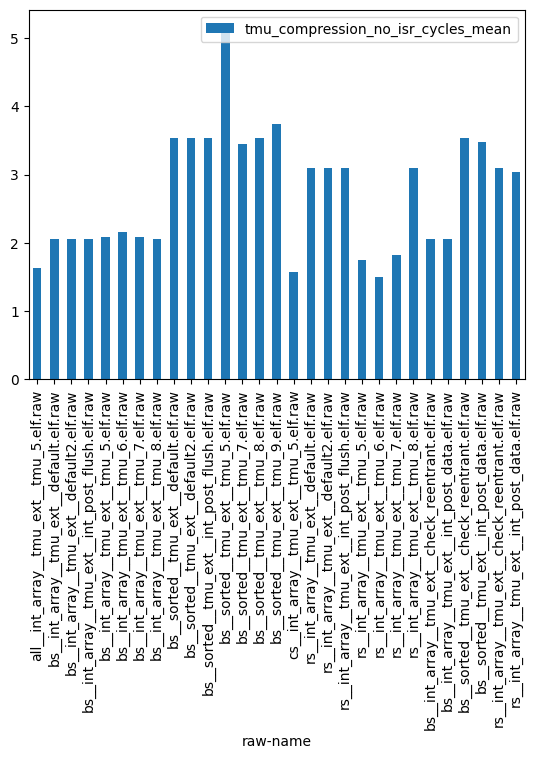

In [14]:
tmu.groupby(by=['soc','soc_config','firmware']).plot(kind='bar', x='raw-name', y='tmu_compression_no_isr_cycles_mean')

In [11]:
tmu.groupby(by=['soc','soc_config','firmware']).plot(kind='bar', x='raw-name', y='tmu_decoded_compression_cycles_mean')

NameError: name 'tmu' is not defined

In [ ]:
# best compression scatter
best_idx = tmu['tmu_decoded_compression_cycles_mean'].idxmax()
tmu_dfs[best_idx]['cont'].plot(kind='hist',bins=range(0,22),logy=True)

In [ ]:
# worst compression scatter
best_idx = tmu['tmu_decoded_compression_cycles_mean'].idxmin()
tmu_dfs[best_idx]['cont'].plot(kind='hist',bins=range(0,22), logy=True)

In [ ]:
df

In [ ]:
df[df['raw-name'].str.contains("post")]

In [ ]:
df.iloc[2]

In [ ]:
tmp = tmu_dfs[df.index[72]] #2

tmp

In [ ]:
hex(tmp[tmp["tid"]<=2]['address'][2])

In [ ]:
tmp["addr_hex"] = [hex(x) for x in tmp["address"]]

In [ ]:
tmp[tmp["tid"]<=4]

In [ ]:
tmp[tmp["qid"]<=2]

In [ ]:
tmp[tmp["qid"]<=3].groupby(by=['qid', 'address']).count()

In [ ]:
df.iloc[5] #5

In [ ]:
#find_tmu_isr(tmu_dfs[df.index[5]])
tmp = tmu_dfs[df.index[5]] #70
tmp[tmp['isr']==True]

In [ ]:
tmp

In [ ]:
tmp[tmp["qid"]==6]

In [ ]:
tmp

In [ ]:
# check all ilocs -.-